In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Livwell Peru Clean2.csv")

In [4]:
df['region_type'] = df['region_type'].str.capitalize()
df = df[df['region_type'].isin(['Coastal', 'Highland', 'Amazon'])]

In [5]:
sns.set(style="whitegrid")

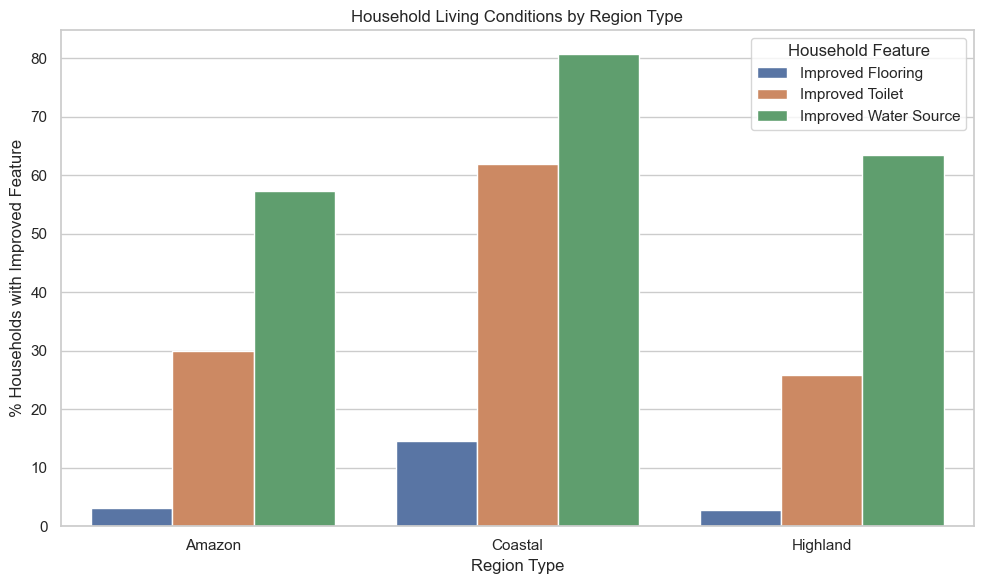

In [8]:
# Household Living Conditions by Region Type

living_cols = {
    "HH_floor_high_p": "Improved Flooring",
    "HH_toilet_high_p": "Improved Toilet",
    "HH_water_high_p": "Improved Water Source"
}
living_df = df[["region_type"] + list(living_cols.keys())]
living_df = living_df.groupby("region_type").mean().reset_index()
living_df = living_df.melt(id_vars="region_type", var_name="Indicator", value_name="Percentage")
living_df["Indicator"] = living_df["Indicator"].map(living_cols)

plt.figure(figsize=(10, 6))
sns.barplot(data=living_df, x="region_type", y="Percentage", hue="Indicator")
plt.title("Household Living Conditions by Region Type")
plt.ylabel("% Households with Improved Feature")
plt.xlabel("Region Type")
plt.legend(title="Household Feature")
plt.tight_layout()
plt.show()


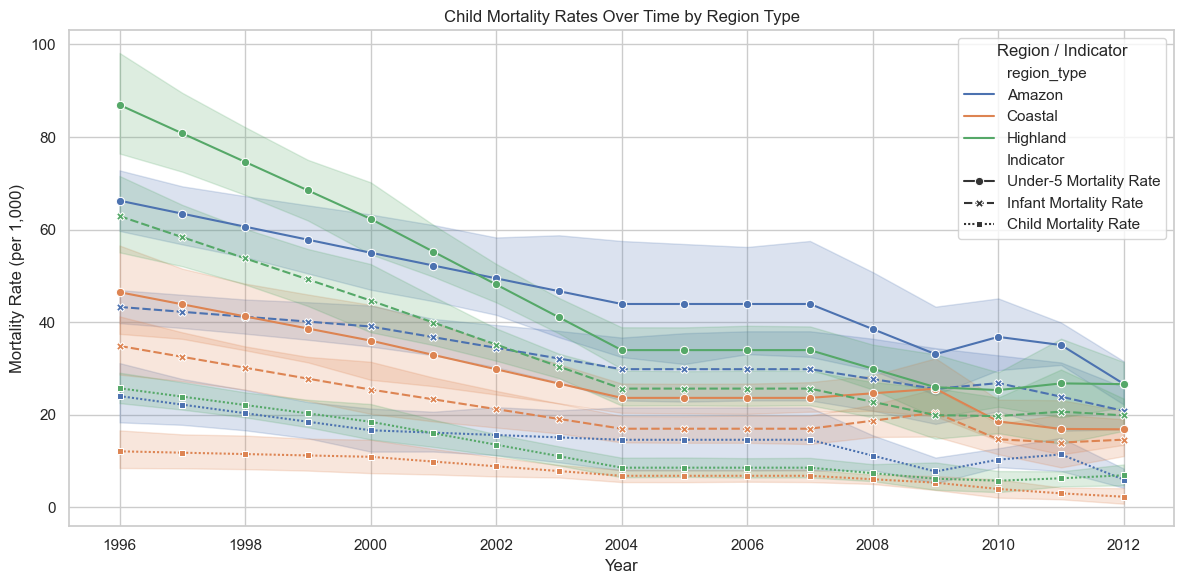

In [9]:
# Child Mortality Trends by Region Type and Year

mortality_cols = {
    "HL_U5MR": "Under-5 Mortality Rate",
    "HL_IMR": "Infant Mortality Rate",
    "HL_CMR": "Child Mortality Rate"
}
mortality_df = df[["year", "region_type"] + list(mortality_cols.keys())]
mortality_df = mortality_df.melt(id_vars=["year", "region_type"], var_name="Indicator", value_name="Rate")
mortality_df["Indicator"] = mortality_df["Indicator"].map(mortality_cols)

plt.figure(figsize=(12, 6))
sns.lineplot(data=mortality_df, x="year", y="Rate", hue="region_type", style="Indicator", markers=True)
plt.title("Child Mortality Rates Over Time by Region Type")
plt.ylabel("Mortality Rate (per 1,000)")
plt.xlabel("Year")
plt.legend(title="Region / Indicator")
plt.tight_layout()
plt.show()


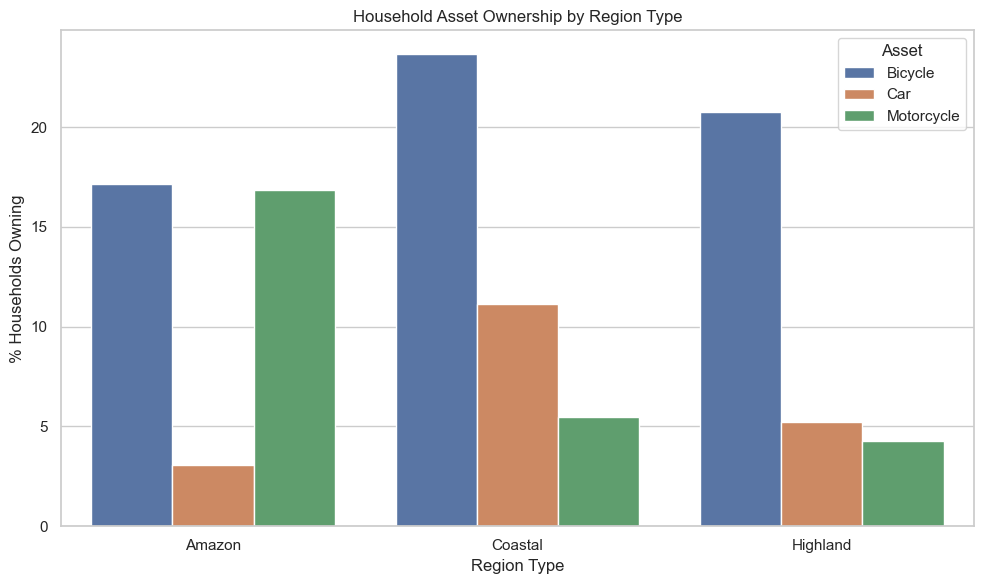

In [10]:
# Household Asset Ownership by Region Type
asset_cols = {
    "HH_bicycle_p": "Bicycle",
    "HH_car_p": "Car",
    "HH_motorcycle_p": "Motorcycle"
}
assets_df = df[["region_type"] + list(asset_cols.keys())]
assets_df = assets_df.groupby("region_type").mean().reset_index()
assets_df = assets_df.melt(id_vars="region_type", var_name="Asset", value_name="Ownership (%)")
assets_df["Asset"] = assets_df["Asset"].map(asset_cols)

plt.figure(figsize=(10, 6))
sns.barplot(data=assets_df, x="region_type", y="Ownership (%)", hue="Asset")
plt.title("Household Asset Ownership by Region Type")
plt.ylabel("% Households Owning")
plt.xlabel("Region Type")
plt.legend(title="Asset")
plt.tight_layout()
plt.show()

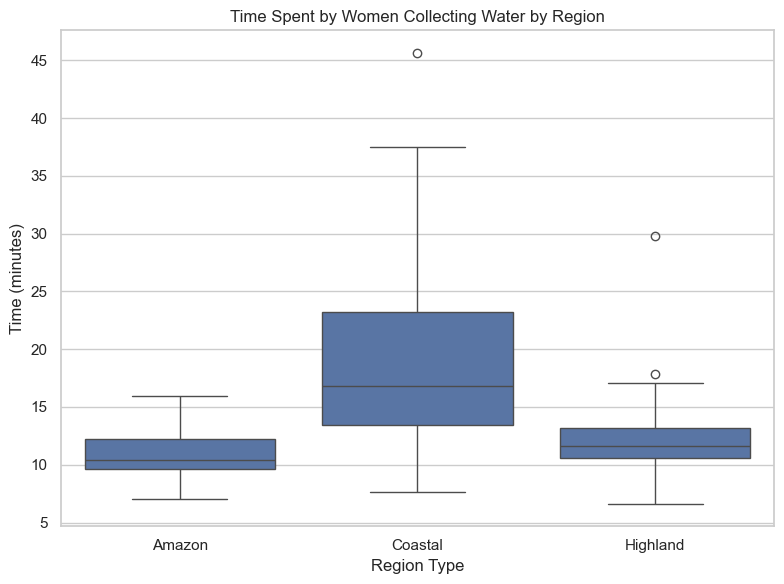

In [11]:
# Time Spent Collecting Water by Women
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="region_type", y="HH_women_time_water_mean")
plt.title("Time Spent by Women Collecting Water by Region")
plt.ylabel("Time (minutes)")
plt.xlabel("Region Type")
plt.tight_layout()
plt.show()

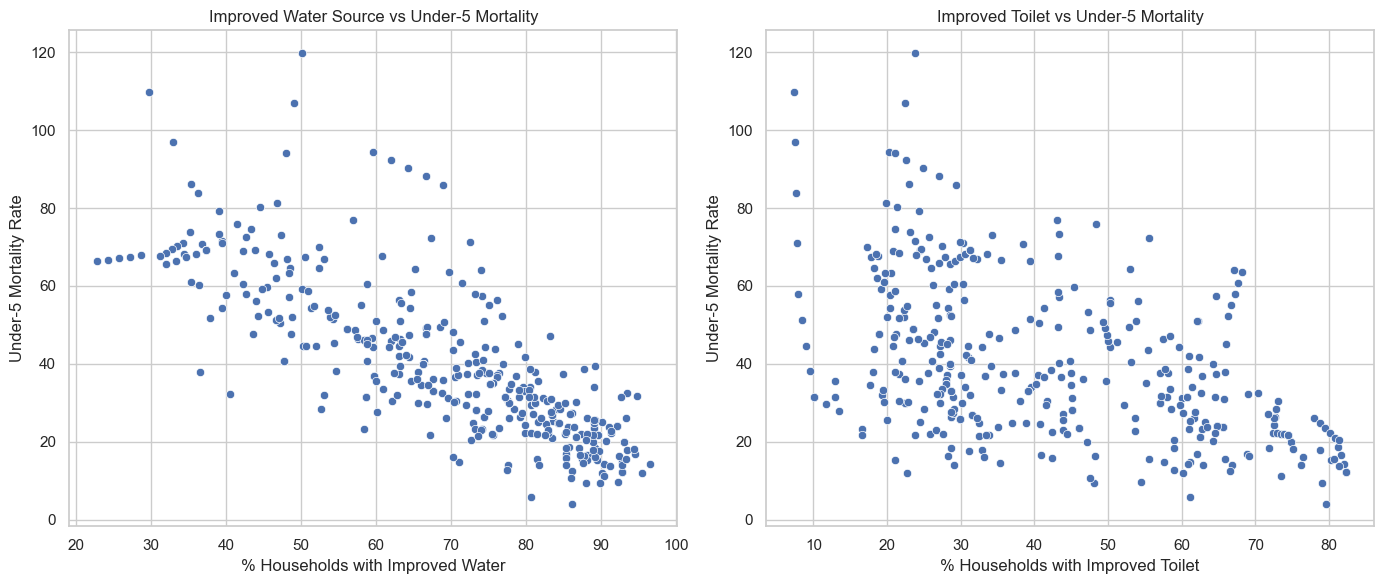

In [12]:
# Improved Resources vs Under-5 Mortality
scatter_df = df[["HH_water_high_p", "HH_toilet_high_p", "HL_U5MR"]].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(data=scatter_df, x="HH_water_high_p", y="HL_U5MR", ax=axes[0])
axes[0].set_title("Improved Water Source vs Under-5 Mortality")
axes[0].set_xlabel("% Households with Improved Water")
axes[0].set_ylabel("Under-5 Mortality Rate")

sns.scatterplot(data=scatter_df, x="HH_toilet_high_p", y="HL_U5MR", ax=axes[1])
axes[1].set_title("Improved Toilet vs Under-5 Mortality")
axes[1].set_xlabel("% Households with Improved Toilet")
axes[1].set_ylabel("Under-5 Mortality Rate")

plt.tight_layout()
plt.show()